In [ ]:
pip install yfinance

In [3]:
import math
import matplotlib.pyplot as plt
import numpy
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential


In [19]:
def lstm(stock_name):
    def fetching_price(stock="ADANIENT.NS"):
      data = yf.download(tickers=stock, period='60d', interval='15m')
      df = pd.DataFrame(data)
      return df
    df = fetching_price(stock_name)
    # df1 = df.reset_index()['Close']
    # from sklearn.preprocessing import MinMaxScaler
    # scaler = MinMaxScaler(feature_range=(0, 1))
    # df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))
    # training_size = int(len(df1) * 0.65)
    # test_size = len(df1) - training_size
    # train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]
    # def create_dataset(dataset, time_step=1):
    #     dataX, dataY = [], []
    #     for i in range(len(dataset) - time_step - 1):
    #         a = dataset[i:(i + time_step), 0]  ###i=0, 0,1,2,3-----99   100
    #         dataX.append(a)
    #         dataY.append(dataset[i + time_step, 0])
    #     return np.array(dataX), np.array(dataY)
    # time_step = 100
    # X_train, y_train = create_dataset(train_data, time_step)
    # X_test, ytest = create_dataset(test_data, time_step)
    # X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    # X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    temp = df
    def df_to_x_y(col_name, window_size=30):
      df = temp[col_name]
      df_as_np = df.to_numpy()
      x =  []
      y = []
      for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        x.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
      return np.array(x), np.array(y) 


    column_name = ['Close', 'Open', 'High', 'Low'] 
    x_close,y_close = df_to_x_y('Close')
    x_open,y_open  = df_to_x_y("Open")
    x_high,y_high  = df_to_x_y("High")
    x_low,y_low  = df_to_x_y("Low")

# print(x_open.shape, y_open.shape, x_close.shape, y_close.shape, x_high.shape, y_high.shape, x_low.shape, y_low.shape)
# idol shape ((3487, 30), (746, 30), (747, 30))
    t_value = 70
    vali_value = 85
    x_train_close  = np.reshape(x_close[:int(len(x_close)*t_value/100)], (int(len(x_close)*t_value/100),30)) 
    y_train_close =  np.reshape(y_close[:int(len(y_close)*t_value/100)],(int(len(x_close)*t_value/100),1))
    x_val_close  =   np.reshape(x_close[(int(len(x_close)*t_value/100))+1:int(len(x_close)*vali_value/100)],((int(len(x_close)*vali_value/100))-(int(len(x_close)*t_value/100)+1),30))
    y_val_close  =   np.reshape(y_close[(int(len(x_close)*t_value/100))+1:int(len(y_close)*vali_value/100)],((int(len(y_close)*vali_value/100))-(int(len(y_close)*t_value/100)+1),1))
    x_test_close =   np.reshape(x_close[(int(len(y_close)*vali_value/100))+1:], (len(x_close)-(int(len(x_close)*vali_value/100))-1,30))
    y_test_close =   np.reshape(y_close[(int(len(y_close)*vali_value/100))+1:], (len(y_close)-(int(len(y_close)*vali_value/100))-1, 1))

    x_train_open = np.reshape(x_open[:int(len(x_open)*t_value/100)],(int(len(x_open)*t_value/100),30))
    y_train_open = np.reshape(y_open[:int(len(y_open)*t_value/100)], (int(len(x_open)*t_value/100),1))
    x_val_open   = np.reshape(x_open[(int(len(x_open)*t_value/100))+1:int(len(x_open)*vali_value/100)],((int(len(x_open)*vali_value/100))-(int(len(x_open)*t_value/100)+1),30))
    y_val_open  =  np.reshape(y_open[(int(len(y_open)*t_value/100))+1:int(len(y_open)*vali_value/100)],((int(len(y_open)*vali_value/100))-(int(len(y_open)*t_value/100)+1),1))
    x_test_open =  np.reshape(x_open[(int(len(x_open)*vali_value/100))+1:],(len(x_open)-(int(len(x_open)*vali_value/100))-1,30))
    y_test_open =  np.reshape(y_open[(int(len(y_open)*vali_value/100))+1:],(len(y_open)-(int(len(y_open)*vali_value/100))-1,1))
    
    model.fit(x_train_close, y_train_close, validation_data=(x_val_close, y_val_close), epochs=2, verbose=1)

In [24]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 30)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
print(model.summary())
model.compile(loss='mean_squared_error', optimizer='adam')

# available_stocks = ['ADANIENT.NS', 'TCS.NS', 'AXISBANK.NS', 
#                     'INDUSINDBK.NS', 'ULTRACEMCO.NS', 'ICICIBANK.NS',
#                     'NESTLEIND.NS', 'WIPRO.NS', 'SBIN.NS', 'ONGC.NS']
available_stocks = ['ADANIENT.NS']
for i in available_stocks:
  lstm(i)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_80 (LSTM)              (None, None, 50)          16200     
                                                                 
 lstm_81 (LSTM)              (None, None, 50)          20200     
                                                                 
 lstm_82 (LSTM)              (None, 50)                20200     
                                                                 
 dense_26 (Dense)            (None, 1)                 51        
                                                                 
Total params: 56,651
Trainable params: 56,651
Non-trainable params: 0
_________________________________________________________________
None
[*********************100%***********************]  1 of 1 completed
Epoch 1/2


ValueError: ignored

[*********************100%***********************]  1 of 1 completed


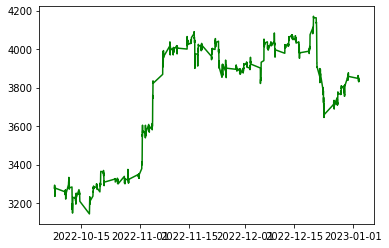

In [29]:
def fetching_price(stock="ADANIENT.NS"):
      data = yf.download(tickers=stock, period='60d', interval='15m')
      df = pd.DataFrame(data)
      return df

def plotting():
    stock_price = fetching_price("ADANIENT.NS")
    plt.plot(stock_price.index, stock_price['Close'], color="green")
    # plt.plot(stock_price.index,stock_price['Open'], color="blue")
    # plt.plot(stock_price.index,stock_price['High'], color="green")
    # plt.plot(stock_price.index, stock_price['Low'], color="red")
    plt.show()

plotting()